In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

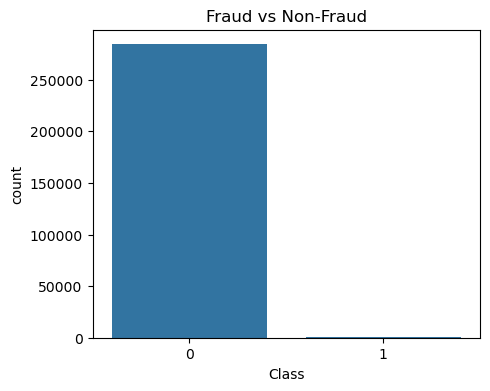

In [10]:
# Exploratory Data Analysis
plt.figure(figsize=(5,4))
sns.countplot(x=df['Class'])
plt.title("Fraud vs Non-Fraud")
plt.show()

In [11]:
#Split  feature & Target
x=df.drop("Class",axis=1)
y=df["Class"]

In [12]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
#Fix class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)
print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_train_res.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=2000)
model.fit(x_train_res,y_train_res)

LogisticRegression(max_iter=2000)

In [25]:
#Prediction
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [26]:
y_prob=model.predict_proba(x_test)[:,1]

In [28]:
#Evaluation
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
auc=roc_auc_score(y_test,y_prob)
print("AUC Score:",auc)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

[[55424  1440]
 [    8    90]]
AUC Score: 0.9785828952430718


In [29]:
#save  Model
import joblib
joblib.dump(model,"fraud_detection_model.pkl")
joblib.dump(scaler,"scaler.pkl")
print("Model Save successully!")

Model Save successully!
